In [172]:
import folium
import pandas as pd

In [145]:
# ascii_grid = np.loadtxt("/Users/shuffle_new/Desktop/Prelim/Modeling/Data/gpw-v4-population-density-adjusted-to-2015-unwpp-country-totals-rev11_2020_30_min_asc/gpw_v4_population_density_adjusted_to_2015_unwpp_country_totals_rev11_2020_30_min.asc", skiprows=6)

In [146]:
loc_x = 37
loc_y = -122

In [147]:
reso = 0

In [169]:
M = 500

In [170]:
x_index = int(np.shape(ascii_grid)[0] - loc_x/9*1080)
y_index = int((loc_y + 180)/9*1080)

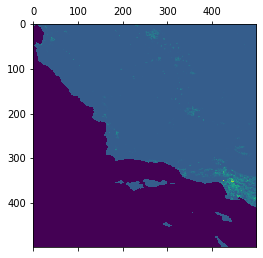

In [171]:
import matplotlib.pyplot as plt
plt.matshow(ascii_grid[x_index:x_index+M,y_index:y_index+M])

In [176]:
from folium.plugins import HeatMap


In [175]:
# define the world map
world_map = folium.Map()

# display world map
# world_map
# San Francisco latitude and longitude values
latitude = 37.77
longitude = -122.42

# Create map and display it
san_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# Display the map of San Francisco
san_map

In [178]:
cdata = pd.read_csv('https://cocl.us/sanfran_crime_dataset')
cdata.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [180]:
# get the first 200 crimes in the cdata
limit = 200
data = cdata.iloc[0:limit, :]

In [183]:
heatdata

[[37.775420706711, -122.40340479147899],
 [37.775420706711, -122.40340479147899],
 [37.729980967299596, -122.388856204292],
 [37.78578837668879, -122.412970537591],
 [37.7650501214668, -122.419671780296],
 [37.788018555829, -122.42607717737499],
 [37.7808789360214, -122.405721454567],
 [37.7839805592634, -122.411778295992],
 [37.775787621829295, -122.393357241451],
 [37.7209669615499, -122.387181635995],
 [37.764478157869505, -122.47737652400299],
 [37.745738942965495, -122.477960327299],
 [37.735697027548206, -122.37675765553001],
 [37.7292705199592, -122.432325871028],
 [37.791642982384, -122.40090869888999],
 [37.7837069301545, -122.408595110869],
 [37.757289590457795, -122.406870402082],
 [37.7489063051829, -122.42035478086099],
 [37.715765426995, -122.439909766772],
 [37.7835699386918, -122.408421116922],
 [37.773618627645604, -122.422315670749],
 [37.792841284044705, -122.42451983500901],
 [37.754098688206795, -122.41423384903798],
 [37.754098688206795, -122.41423384903798],
 [37

In [181]:
# let's start again with a clean copy of the map of San Francisco
san_map = folium.Map(location = [latitude, longitude], zoom_start = 12)

# Convert data format
heatdata = data[['Y','X']].values.tolist()

# add incidents to map
HeatMap(heatdata).add_to(san_map)

san_map

In [184]:
sliceDF = data

In [200]:
# Add a column with ones, then calculate sum and generate the heat
sliceDF['count'] = 1 
# create map of Calgary using latitude and longitude values
base_heatmap = folium.Map(location=[latitude, longitude], zoom_start=10)
# Just adding a marker for fun
folium.Marker((latitude,longitude), popup='label').add_to(base_heatmap)
HeatMap(data=sliceDF[['X', 'Y', 'count']].groupby(['Y', 'X']).sum().reset_index().values.tolist(), radius=8, max_zoom=4).add_to(base_heatmap)
# If you want to save the map 
base_heatmap.save(outfile= 'truckheatMap.html')
# To show the map in jupyter
base_heatmap

/Users/shuffle_new/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [202]:
data

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,count
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120,1
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168,1
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010,1
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000,1
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,160231808,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",Saturday,03/19/2016 12:00:00 AM,22:15,SOUTHERN,NONE,0 Block of DORE ST,-122.413046,37.773862,"(37.7738617771611, -122.413045971966)",16023180864020,1
196,160001366,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",Friday,01/01/2016 12:00:00 AM,11:50,INGLESIDE,NONE,200 Block of LAIDLEY ST,-122.427951,37.738172,"(37.7381718902343, -122.427951236033)",16000136664020,1
197,160001388,ROBBERY,ROBBERY OF A CHAIN STORE WITH BODILY FORCE,Friday,01/01/2016 12:00:00 AM,11:15,MISSION,"ARREST, BOOKED",1500 Block of VALENCIA ST,-122.420247,37.748520,"(37.748520075538, -122.420247296449)",16000138803044,1
198,160001388,STOLEN PROPERTY,"STOLEN PROPERTY, POSSESSION WITH KNOWLEDGE, RE...",Friday,01/01/2016 12:00:00 AM,11:15,MISSION,"ARREST, BOOKED",1500 Block of VALENCIA ST,-122.420247,37.748520,"(37.748520075538, -122.420247296449)",16000138811012,1


In [213]:
from folium.plugins import HeatMapWithTime, get_geojson_grid

ImportError: cannot import name 'get_geojson_grid' from 'folium.plugins' (/Users/shuffle_new/miniconda3/envs/py3/lib/python3.7/site-packages/folium/plugins/__init__.py)

In [208]:
# Creating list of hours that we need to slice by to generate the time variant map
df_hour_list = []
for hour in sliceDF.Time.sort_values().unique():
    df_hour_list.append(sliceDF.loc[sliceDF.Time == hour, ['X', 'Y', 'count']].groupby(['Y', 'X']).sum().reset_index().values.tolist())
base_heattimemap = folium.Map(location=[latitude, longitude], zoom_start=11)
HeatMapWithTime(df_hour_list, radius=8, gradient={0.2: 'blue', 0.4: 'lime', 0.6: 'orange', 1: 'red'}, min_opacity=0.8, max_opacity=1, use_local_extrema=True).add_to(base_heattimemap)

base_heattimemap

In [214]:
def get_geojson_grid(upper_right, lower_left, n=6):
    """Returns a grid of geojson rectangles, and computes the exposure 
        in each section of the grid based on the vessel data.

    Parameters
    ----------
    upper_right: array_like
        The upper right hand corner of "grid of grids" (the default is 
   the upper right hand [lat, lon] of the USA).

    lower_left: array_like
        The lower left hand corner of "grid of grids"  (the default is 
     the lower left hand [lat, lon] of the USA).

    n: integer
        The number of rows/columns in the (n,n) grid.

    Returns
    -------

    list
        List of "geojson style" dictionary objects   
    """

    all_boxes = []

    lat_steps = np.linspace(lower_left[0], upper_right[0], n+1)
    lon_steps = np.linspace(lower_left[1], upper_right[1], n+1)

    lat_stride = lat_steps[1] - lat_steps[0]
    lon_stride = lon_steps[1] - lon_steps[0]

    for lat in lat_steps[:-1]:
        for lon in lon_steps[:-1]:
            # Define dimensions of box in grid
            upper_left = [lon, lat + lat_stride]
            upper_right = [lon + lon_stride, lat + lat_stride]
            lower_right = [lon + lon_stride, lat]
            lower_left = [lon, lat]

            # Define json coordinates for polygon
            coordinates = [
                upper_left,
                upper_right,
                lower_right,
                lower_left,
                upper_left
            ]

            geo_json = {"type": "FeatureCollection",
                        "properties":{
                            "lower_left": lower_left,
                            "upper_right": upper_right
                        },
                        "features":[]}

            grid_feature = {
                "type":"Feature",
                "geometry":{
                    "type":"Polygon",
                    "coordinates": [coordinates],
                }
            }

            geo_json["features"].append(grid_feature)

            all_boxes.append(geo_json)

    return all_boxes 

In [ ]:
# loc_x = 37
# loc_y = -122

In [ ]:
def plot_density():
    upper_right = [38.1741,-121.8925]
    lower_left = [37,-123.2715]
    

In [232]:
# Used a def so that if you wish to add interactivity you can do that easily later on.
def plot(min_hour,max_hour,n):
    #boundaries of the main rectangle
    upper_right = [38.1741,-121.8925]
    lower_left = [37,-123.2715]
    
    # Creating a grid of nxn from the given cordinate corners     
    grid = get_geojson_grid(upper_right, lower_left , n)
    # Holds number of points that fall in each cell & time window if provided
    counts_array = []
    
    # Adding the total number of visits to each cell
    for box in grid:
        # get the corners for each cell
        upper_right = box["properties"]["upper_right"]
        lower_left = box["properties"]["lower_left"]
# check to make sure it's in the box and between the time window if time window is given 
        mask = ((sliceDF.X <= upper_right[1]) & (sliceDF.X >= lower_left[1]) &
            (sliceDF.Y <= upper_right[0]) & (sliceDF.Y >= lower_left[0]))
# Number of points that fall in the cell and meet the condition 
        counts_array.append(len(sliceDF[mask]))
# creating a base map 
    m = folium.Map(zoom_start = 10, location=[latitude, longitude])
# Add GeoJson to map
    for i, geo_json in enumerate(grid):
        relativeCount = counts_array[i]*100/4345
        color = plt.cm.YlGn(relativeCount)
        color = mpl.colors.to_hex(color)
        gj = folium.GeoJson(geo_json,
                style_function=lambda feature, color=color: {
                    'fillColor': color,
                    'color':"gray",
                    'weight': 0.5,
                    'dashArray': '6,6',
                    'fillOpacity': 0.8,
                })
        m.add_child(gj)
        
    colormap = branca.colormap.linear.YlGn_09.scale(0, 1)
    colormap = colormap.to_step(index=[0, 0.3, 0.6, 0.8 , 1])
    colormap.caption = 'Relative density of fleet activity per cell'
    colormap.add_to(m)
    return m
# limiting time window for our data to 8 am - 5 pm and also grid is 20 x 20 
plot(8,17,40)

In [224]:
import matplotlib as mpl
import branca

In [151]:
ascii_grid[loc_x:loc_x+M,loc_y:loc_y+M]

array([], shape=(2000, 0), dtype=float64)

In [152]:
90/np.shape(ascii_grid)[1]

0.008333333333333333

In [65]:
np.max(ascii_grid[:8000,:8000])

38470.68

In [140]:
x_index

6336.0

In [141]:
y_index

6960.0